In [144]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

Mounted at /content/drive


In [145]:
train_dir='/kaggle/input/damage-location-dataset/training/training'

In [146]:
image_size = (224,224)
batch_size = 32

In [147]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.15
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

Found 831 images belonging to 3 classes.


In [148]:
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 145 images belonging to 3 classes.


In [150]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
base_model = tf.keras.applications.vgg19.VGG19(weights='imagenet', include_top=False)


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu', kernel_regularizer=l2(0.001))(x)
predictions = Dense(3, activation='softmax')(x)

In [151]:
model = tf.keras.Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
epochs = 20
h=model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs,
    callbacks=[reduce_lr, early_stopping]
)

Epoch 1/20


W0000 00:00:1710087015.797561     141 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 3/25 ━━━━━━━━━━━━━━━━━━━━ 10s 489ms/step - accuracy: 0.2795 - loss: 1.8330

W0000 00:00:1710087096.677641     140 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.3650 - loss: 1.7867

W0000 00:00:1710087109.132900     141 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


25/25 ━━━━━━━━━━━━━━━━━━━━ 105s 4s/step - accuracy: 0.3666 - loss: 1.7859 - val_accuracy: 0.4844 - val_loss: 1.7251 - learning_rate: 1.0000e-05
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 812ms/step - accuracy: 0.4062 - loss: 1.7549 - val_accuracy: 0.4706 - val_loss: 1.7045 - learning_rate: 1.0000e-05
Epoch 3/20


W0000 00:00:1710087130.093971     141 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 573ms/step - accuracy: 0.4868 - loss: 1.7015 - val_accuracy: 0.5781 - val_loss: 1.6025 - learning_rate: 1.0000e-05
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6875 - loss: 1.5675 - val_accuracy: 0.4118 - val_loss: 1.6878 - learning_rate: 1.0000e-05
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 566ms/step - accuracy: 0.5960 - loss: 1.5509 - val_accuracy: 0.6562 - val_loss: 1.4903 - learning_rate: 1.0000e-05
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4375 - loss: 1.7911 - val_accuracy: 0.7059 - val_loss: 1.4124 - learning_rate: 1.0000e-05
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 560ms/step - accuracy: 0.6518 - loss: 1.4404 - val_accuracy: 0.6641 - val_loss: 1.4072 - learning_rate: 1.0000e-05
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6875 - loss: 1.3812 - val_accuracy: 0.7059 - val_loss: 1.4390 - learning_rate: 1.0000e-05
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 570ms/step - accuracy: 0.7285 - loss

In [174]:
from tensorflow.keras.preprocessing.image import load_img
image = load_img('/kaggle/input/damage-location-dataset/training/training/00-front/0056.JPEG', target_size=(224,224,3))

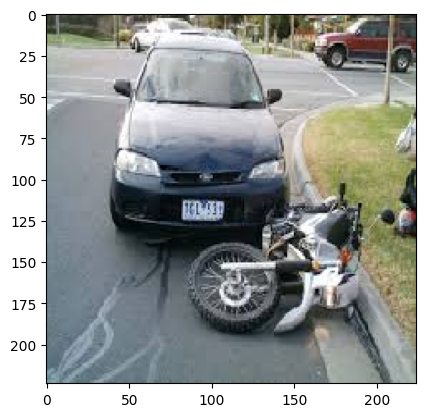

In [175]:
import matplotlib.pyplot as plt
plt.imshow(image)


In [176]:
from tensorflow.keras.preprocessing.image import img_to_array
image = img_to_array(image)
#image=image/255

In [177]:
from tensorflow.keras.applications.vgg16 import preprocess_input
image = preprocess_input(image)

In [178]:
import numpy as np
image=np.expand_dims(image,axis=0)
pred = model.predict(image)
pred_labels=np.argmax(pred,axis=1)
#d={0:'Front',1:'Rear',2:'Side'}
#for key in d.keys():
#    if pred_labels[0]==key:
#        print("validating location of damage...........Result:",d[key])
#    print("severity assessment complete")
#print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [179]:
pred

array([[9.9997532e-01, 2.4649878e-05, 0.0000000e+00]], dtype=float32)

In [180]:
d={0:'Front',1:'Rear',2:'Side'}
for key in d.keys():
    if pred_labels[0]==key:
       print("validating location of damage...........Result:",d[key])
       print("severity assessment complete")

validating location of damage...........Result: Front
severity assessment complete


In [181]:
print(pred)

[[9.9997532e-01 2.4649878e-05 0.0000000e+00]]


In [182]:
pred_labels

array([0])

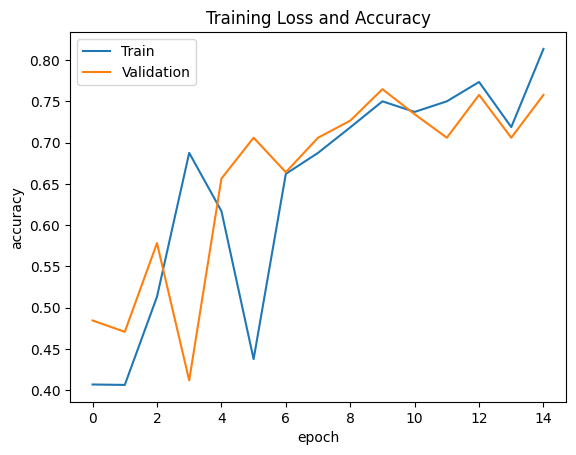

In [183]:
plt.plot(h.history['accuracy']) #get the accuracy for the training set from the model's history attribute
plt.plot(h.history['val_accuracy'])   #get the loss for the training set from the model's history attribute
plt.title('Training Loss and Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])

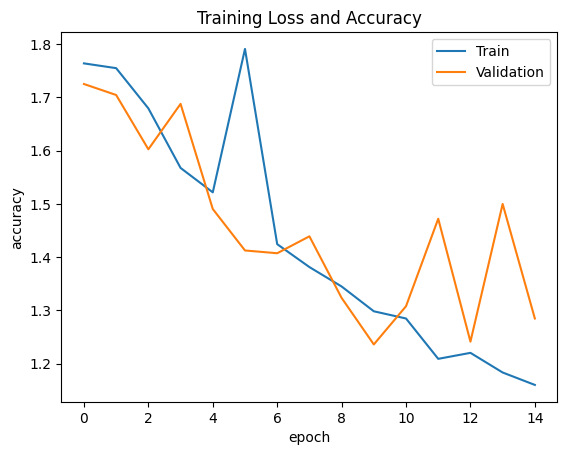

In [184]:
plt.plot(h.history['loss']) #get the accuracy for the training set from the model's history attribute
plt.plot(h.history['val_loss'])   #get the loss for the training set from the model's history attribute
plt.title('Training Loss and Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])

In [169]:
model.save('/kaggle/working/damage_location_modified.h5')